# Project 1: House Pricing Prediction

**Type:** Regression | **Level:** Beginner

Predict house prices using features like area, bedrooms, location.

**Model:** Linear Regression

**Dataset:** [Kaggle House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 1. Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/Housing.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (545, 13)

Column names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First few rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 3. Exploratory Data Analysis

Dataset Info:
Rows: 545, Columns: 13

Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Missing values: 0

Target variable (price) statistics:
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


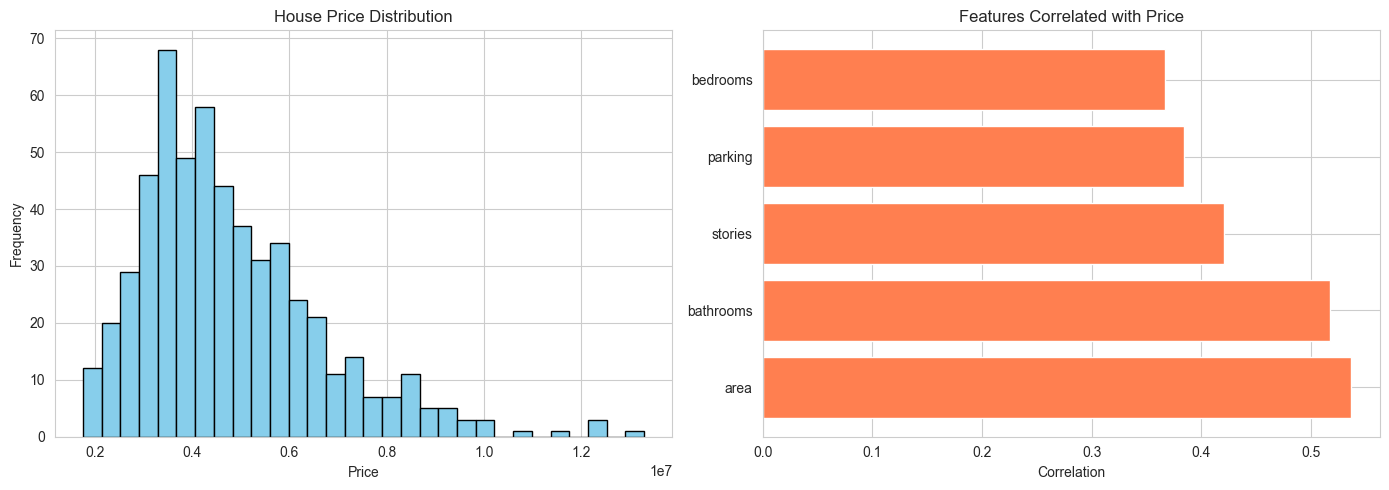

In [3]:
# Basic info
print("Dataset Info:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nTarget variable (price) statistics:")
print(df['price'].describe())

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution
axes[0].hist(df['price'], bins=30, edgecolor='black', color='skyblue')
axes[0].set_title('House Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Correlation with price for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['price'].sort_values(ascending=False)[1:]
axes[1].barh(range(len(correlations)), correlations.values, color='coral')
axes[1].set_yticks(range(len(correlations)))
axes[1].set_yticklabels(correlations.index)
axes[1].set_title('Features Correlated with Price')
axes[1].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [4]:
# Prepare features and target
# Convert categorical variables to numeric
df_processed = df.copy()

# Binary yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Furnishing status - ordinal encoding
furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map(furnishing_map)

# Separate features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names:\n{X.columns.tolist()}")
print(f"\nSample of processed data:")
X.head()

Features shape: (545, 12)
Target shape: (545,)

Feature names:
['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Sample of processed data:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


## 5. Model Training

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully!")

Training set size: 436
Test set size: 109

Model trained successfully!


## 6. Model Evaluation

Model Performance:
Training RMSE: ₹984,836.44
Test RMSE:     ₹1,331,071.42

Training MAE:  ₹718,146.60
Test MAE:      ₹979,679.69

Training R²:   0.6854
Test R²:       0.6495


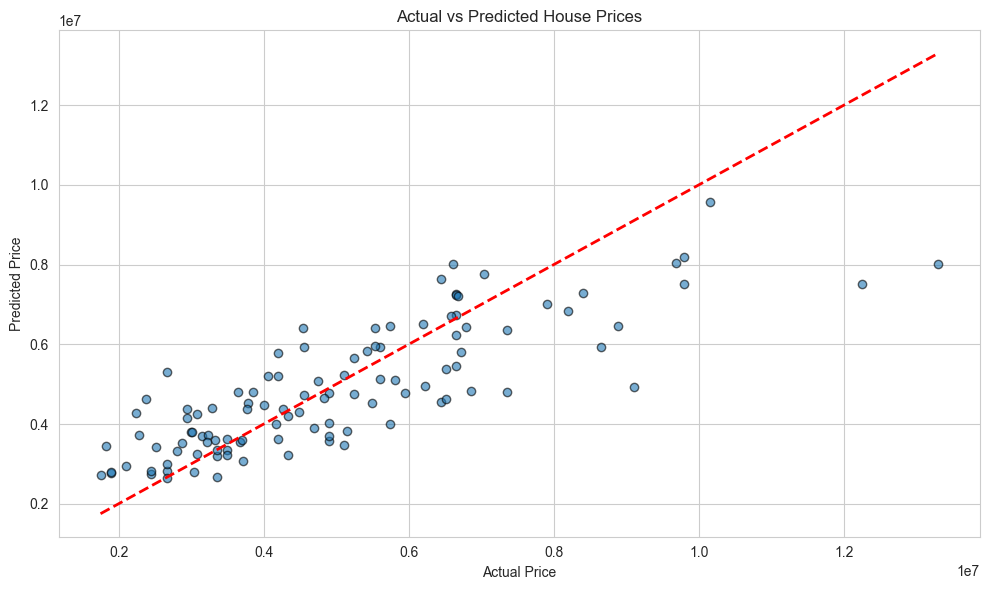

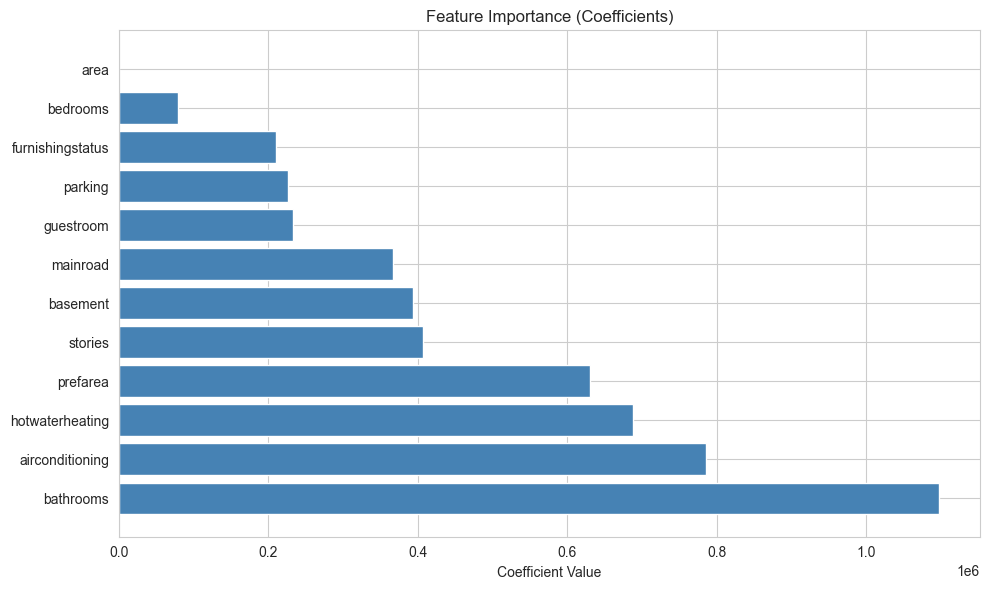


Feature Coefficients:
         feature  coefficient
       bathrooms 1.097117e+06
 airconditioning 7.855506e+05
 hotwaterheating 6.878813e+05
        prefarea 6.299017e+05
         stories 4.062232e+05
        basement 3.931598e+05
        mainroad 3.668242e+05
       guestroom 2.331468e+05
         parking 2.257565e+05
furnishingstatus 2.103971e+05
        bedrooms 7.857449e+04
            area 2.358488e+02


In [6]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print("="*50)
print(f"Training RMSE: ₹{train_rmse:,.2f}")
print(f"Test RMSE:     ₹{test_rmse:,.2f}")
print(f"\nTraining MAE:  ₹{train_mae:,.2f}")
print(f"Test MAE:      ₹{test_mae:,.2f}")
print(f"\nTraining R²:   {train_r2:.4f}")
print(f"Test R²:       {test_r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['coefficient'], color='steelblue')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.tight_layout()
plt.show()

print("\nFeature Coefficients:")
print(feature_importance.to_string(index=False))

## 7. Save Model

In [7]:
# Save the trained model
model_path = '../models/house_pricing_model.pkl'
joblib.dump(model, model_path)
print(f"✓ Model saved to: {model_path}")

# Save feature names for future use
feature_data = {
    'feature_names': X.columns.tolist(),
    'binary_cols': binary_cols,
    'furnishing_map': furnishing_map
}
feature_path = '../models/house_pricing_features.pkl'
joblib.dump(feature_data, feature_path)
print(f"✓ Feature info saved to: {feature_path}")

print("\n" + "="*50)
print("Model training complete!")
print("="*50)
print("\nTo use the model later:")
print("  model = joblib.load('../models/house_pricing_model.pkl')")
print("  prediction = model.predict(new_data)")

✓ Model saved to: ../models/house_pricing_model.pkl
✓ Feature info saved to: ../models/house_pricing_features.pkl

Model training complete!

To use the model later:
  model = joblib.load('../models/house_pricing_model.pkl')
  prediction = model.predict(new_data)
